## Import packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from wordcloud import WordCloud, STOPWORDS

## Load dataset

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1NsOu7cHaIKUVUn3JH7rWHRalJztoDmw8hVf5WLp3Lkk/export?format=csv'
df = pd.read_csv(url)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score
0,UNICEF Indonesia,UNICEFIndonesia,1.721809e+14,NON_PROFIT,ID,UNICEF tersebar di lebih dari 190 negara di se...,2011-11-02 2:52:16,364764.0,607261.0,2020-04-22 19:40:00 ICT,...,https://www.facebook.com/UNICEFIndonesia/photo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"410,093",251.44
1,Kementerian Kesehatan RI,KementerianKesehatanRI,1.000444e+14,PERSON,ID,Halaman ini adalah halaman resmi milik Kemente...,2013-07-31 6:31:42,1597578.0,4074560.0,2020-11-21 12:13:10 ICT,...,http://sehatnegeriku.kemkes.go.id/baca/rilis-m...,https://sehatnegeriku.kemkes.go.id/baca/umum/2...,NaN,"Sekolah Tatap Muka Dimulai Januari 2021, Peran...","Jakarta, 20 November 2020 Pemerintah pusat mem...",NaN,NaN,NaN,"261,978",121.91
2,Kementerian Komunikasi dan Informatika RI,Kemkominfo,1.000648e+14,PERSON,ID,Official Page for Kementerian Komunikasi dan I...,2011-03-11 16:05:55,131916.0,140701.0,2020-04-30 08:11:57 ICT,...,https://www.facebook.com/159939160727241/photo...,NaN,NaN,Photos from Kementerian Komunikasi dan Informa...,NaN,NaN,NaN,NaN,"143,235","1,507.74"
3,Presiden Joko Widodo,Jokowi,1.000442e+14,PERSON,ID,Akun Resmi Presiden Republik Indonesia,2015-05-11 9:20:04,9718612.0,9973768.0,2020-03-19 17:49:01 ICT,...,https://www.facebook.com/390581294464059/photo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"140,565",7.63
4,Presiden Joko Widodo,Jokowi,1.000442e+14,PERSON,ID,Akun Resmi Presiden Republik Indonesia,2015-05-11 9:20:04,9792990.0,10057934.0,2020-03-30 15:25:47 ICT,...,https://www.facebook.com/390581294464059/photo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"120,418",6.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39262,Kompas.com,KOMPAScom,1.735393e+10,NEWS_SITE,ID,Ketika Perbincangan Dimulai | social@kompas.co...,2008-04-13 11:36:28,10543456.0,10593945.0,2020-10-31 08:22:03 ICT,...,http://dlvr.it/RkhJMn,https://www.kompas.com/edu/read/2020/10/31/074...,NaN,"Jadwal TVRI Belajar dari Rumah Akhir Pekan, Sa...",Kemendikbud melalui TVRI terus menayangkan Pro...,NaN,NaN,NaN,0,-118
39263,Kompas.com,KOMPAScom,1.735393e+10,NEWS_SITE,ID,Ketika Perbincangan Dimulai | social@kompas.co...,2008-04-13 11:36:28,10543456.0,10593945.0,2020-10-27 05:24:06 ICT,...,http://dlvr.it/RkP3WL,https://www.kompas.com/edu/read/2020/10/27/045...,NaN,"Jadwal TVRI Belajar dari Rumah, Selasa 27 Okto...",Berikut ini jadwal Belajar dari Rumah di TVRI ...,NaN,NaN,NaN,0,-118
39264,Kompas.com,KOMPAScom,1.735393e+10,NEWS_SITE,ID,Ketika Perbincangan Dimulai | social@kompas.co...,2008-04-13 11:36:28,10543456.0,10593945.0,2020-10-12 06:33:33 ICT,...,http://dlvr.it/RjPZ9g,https://www.kompas.com/edu/read/2020/10/12/055...,NaN,"Jadwal TVRI Belajar dari Rumah, Senin 12 Oktob...",Bagi siswa yang saat ini mengikuti pembelajara...,NaN,NaN,NaN,0,-118
39265,Kompas.com,KOMPAScom,1.735393e+10,NEWS_SITE,ID,Ketika Perbincangan Dimulai | social@kompas.co...,2008-04-13 11:36:28,10543456.0,10593945.0,2020-10-02 08:43:04 ICT,...,http://dlvr.it/Rhmt8m,https://edukasi.kompas.com/read/2020/10/02/070...,NaN,"Jadwal TVRI Belajar dari Rumah Hari Ini, Jumat...",Kemendikbud melalui TVRI terus menayangkan Pro...,NaN,NaN,NaN,0,-118


In [ ]:
df.dtypes

Page Name                  object
User Name                  object
Facebook Id               float64
Page Category              object
Page Admin Top Country     object
                           ...   
polarity                  float64
tsr                         int64
diversity                 float64
txt                        object
year                       object
Length: 69, dtype: object

## Data Preprocessing

###Only posts with special reactions 


In [ ]:
df = df.drop(df[(df.Love == 0) & (df.Wow == 0) & (df.Haha == 0) & (df.Sad == 0) & (df.Angry == 0) & (df.Care == 0)].index)
df.shape

(9310, 41)

####Summary Statistics

In [ ]:
dftr = df[['Likes','Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']]
dftr.describe().round(2)

,Likes,Love,Wow,Haha,Sad,Angry,Care
count,9310.00,9310.00,9310.00,9310.00,9310.00,9310.00,9310.00
mean,396.92,14.37,1.47,4.42,2.49,0.54,0.91
std,5743.20,261.27,32.54,61.98,37.17,3.82,12.77
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,31.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,101.00,3.00,0.00,0.00,0.00,0.00,0.00
max,404277.00,15366.00,2938.00,3267.00,2849.00,204.00,706.00


In [ ]:
dftsr = df[['Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']]
dftsr.describe()

,Love,Wow,Haha,Sad,Angry,Care
count,9310.000000,9310.000000,9310.000000,9310.000000,9310.00000,9310.000000
mean,14.368421,1.473577,4.416541,2.494629,0.54275,0.907089
std,261.267315,32.537447,61.983580,37.167899,3.81558,12.771754
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,15366.000000,2938.000000,3267.000000,2849.000000,204.00000,706.000000


## Data analysis

###Calculate new fields

#### Posts having each reactions

In [ ]:
# Number of post having each reaction
df['hasLikes'] = 1
df.loc[df['Likes'] == 0, 'hasLikes'] = 0
df['hasLove'] = 1
df.loc[df['Love'] == 0, 'hasLove'] = 0
df['hasWow'] = 1
df.loc[df['Wow'] == 0, 'hasWow'] = 0
df['hasHaha'] = 1
df.loc[df['Haha'] == 0, 'hasHaha'] = 0
df['hasSad'] = 1
df.loc[df['Sad'] == 0, 'hasSad'] = 0
df['hasAngry'] = 1
df.loc[df['Angry'] == 0, 'hasAngry'] = 0
df['hasCare'] = 1
df.loc[df['Care'] == 0, 'hasCare'] = 0

dfar = df[['hasLikes','hasLove', 'hasWow', 'hasHaha', 'hasSad', 'hasAngry', 'hasCare']]
dfar.describe()

,hasLikes,hasLove,hasWow,hasHaha,hasSad,hasAngry,hasCare
count,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000
mean,0.922019,0.747368,0.232975,0.245972,0.249302,0.106015,0.182385
std,0.268156,0.434545,0.422749,0.430685,0.432632,0.307873,0.386182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Posts having special reactions

In [ ]:
dfsr = df[['hasLove', 'hasWow', 'hasHaha', 'hasSad', 'hasAngry', 'hasCare']]
dfsr.describe()

,hasLove,hasWow,hasHaha,hasSad,hasAngry,hasCare
count,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000
mean,0.747368,0.232975,0.245972,0.249302,0.106015,0.182385
std,0.434545,0.422749,0.430685,0.432632,0.307873,0.386182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Proportion of special reactions in each post

In [ ]:
df['specialreactions'] = df['Love'] + df['Wow'] + df['Haha'] + df['Sad'] + df['Angry'] + df['Care']
df['allreactions'] = df['specialreactions'] + df['Likes']

# % of Special Reactions
df['pLove'] = df['Love']/df['specialreactions']
df['pWow'] = df['Wow']/df['specialreactions']
df['pHaha'] = df['Haha']/df['specialreactions']
df['pSad'] = df['Sad']/df['specialreactions']
df['pAngry'] = df['Angry']/df['specialreactions']
df['pCare'] = df['Care']/df['specialreactions']

dfpsr = df[['pLove', 'pWow', 'pHaha', 'pSad', 'pAngry', 'pCare']]
dfpsr.describe().round(2)

,pLove,pWow,pHaha,pSad,pAngry,pCare
count,9310.00,9310.00,9310.00,9310.00,9310.00,9310.00
mean,0.61,0.08,0.11,0.12,0.02,0.05
std,0.43,0.23,0.27,0.29,0.10,0.18
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.80,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00


####Categorized by year

In [ ]:
df['Post Created Date'] = pd.to_datetime(df['Post Created Date'])
df['year'] = 'First'
cutoffdate = datetime.datetime(2021, 2, 28)
df.loc[pd.to_datetime(df['Post Created Date']) > cutoffdate, 'year'] = 'Second'
df['year'].describe()

count      9310
unique        2
top       First
freq       7725
Name: year, dtype: object

In [ ]:
df[['Post Created Date', 'year']]

,Post Created Date,year
0,2020-04-22,First
1,2020-11-21,First
2,2020-04-30,First
3,2020-03-19,First
4,2020-03-30,First
...,...,...
27965,2020-09-09,First
28015,2020-07-23,First
28240,2021-04-30,Second
28241,2021-04-29,Second


####Intensity, Valence, Polarity

In [ ]:
# Intensity = proportion of special reactions over all reactions
df['intensity'] = df['specialreactions']/df['allreactions']
df['intensity'].describe().round(3)

count    9310.000
mean        0.197
std         0.266
min         0.001
25%         0.037
50%         0.091
75%         0.223
max         1.000
Name: intensity, dtype: float64

In [ ]:
# Valence = -1 if love < other reactions, and 1 if otherwise
df['valence'] = 1
df.loc[df['Love'] < (df['Wow']+df['Haha']+df['Sad']+df['Angry']+df['Care']), 'valence'] = -1
df['valence'].describe().round(3)

count    9310.000
mean        0.286
std         0.958
min        -1.000
25%        -1.000
50%         1.000
75%         1.000
max         1.000
Name: valence, dtype: float64

In [ ]:
# Polarity = Intensity * Valence
df['polarity'] = df['intensity']*df['valence']
df['polarity'].describe().round(3)

count    9310.000
mean       -0.018
std         0.331
min        -1.000
25%        -0.056
50%         0.030
75%         0.111
max         1.000
Name: polarity, dtype: float64

In [ ]:
valpyear = pd.crosstab(df.year, df.valence, normalize='index').round(4)*100
valpyear

valence,-1,1
year,,
First,32.79,67.21
Second,49.91,50.09


In [ ]:
valpyear = pd.crosstab(df.year, df.valence)
valpyear

valence,-1,1
year,,
First,2533,5192
Second,791,794


####Valence distributions each year

In [ ]:
valpyear = pd.crosstab(df.year, df.valence, normalize='index').round(4)*100
valpyear

valence,-1,1
year,,
First,32.79,67.21
Second,49.91,50.09


In [ ]:
stat, p, dof, expected = chi2_contingency(valpyear)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[41.35 58.65]
 [41.35 58.65]]
probability=0.950, critical=3.841, stat=5.357
Dependent (reject H0)
significance=0.050, p=0.021
Dependent (reject H0)


###Data Visualizations

####Valence per year

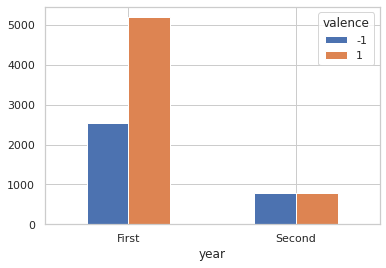

In [ ]:
barplot = valpyear.plot.bar(rot=0)

####Polarity per year

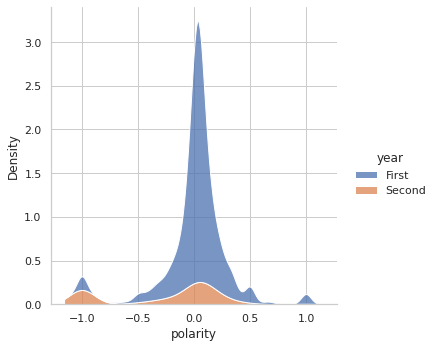

In [ ]:
sns.displot(df, x="polarity", hue="year", kind="kde", multiple="stack")

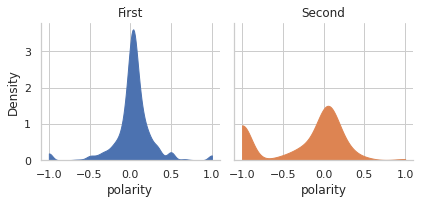

In [ ]:
# set seaborn whitegrid theme
sns.set(style='whitegrid')

# using small multiple
# create a grid 
g = sns.FacetGrid(df, col='year', hue='year', col_wrap=2)

# draw density plots
g = g.map(sns.kdeplot,'polarity', cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles('{col_name}')

# show the graph
plt.show()

####Wordcloud

In [ ]:
wcstopwords = set(STOPWORDS)
#more_stopwords = {}
#more_stopwords = {'belajar', 'dari', 'rumah'}
more_stopwords = {'belajar', 'dari', 'rumah', 'dan', 'di', 'dengan', 'yang', 'ini', 'itu', 'untuk', 'ada', 'dalam', 'kela', 'tidak', 'akan', 'https', 'juga', 'karena','pada', 'anak','sekolah', 'bisa', 'pendidikan', 'guru','covid','siswa','ke','atau','pembelajaran','sudah','kita','oleh','orang','saya','kami','tak','saat','sebagai','para'}
#more_stopwords = {'belajar', 'dari', 'rumah', 'dan', 'di', 'yang', 'nan', 'ini', 'untuk', 'anak', 'dengan'}
#more_stopwords = {'belajar', 'dari', 'rumah', 'dan', 'di', 'yang', 'nan', 'ini', 'untuk', 'anak', 'dengan', 'tidak', 'sekolah', 'kela'}
#more_stopwords = {'belajar', 'dari', 'rumah', 'sekolah', 'di', 'nan', 'yang', 'dan', 'https','ini','untuk','anak','dengan','tidak','kela','atau','itu','oleh','ada','dalam','akan','pendidikan','karena','juga','pada','ke','bisa'}
wcstopwords = wcstopwords.union(more_stopwords)

In [ ]:
dfpos = df.loc[df['valence'] == 1]
dfpos.shape

(5986, 69)

In [ ]:
dfneg = df.loc[df['valence'] == -1]
dfneg.shape

(3324, 69)

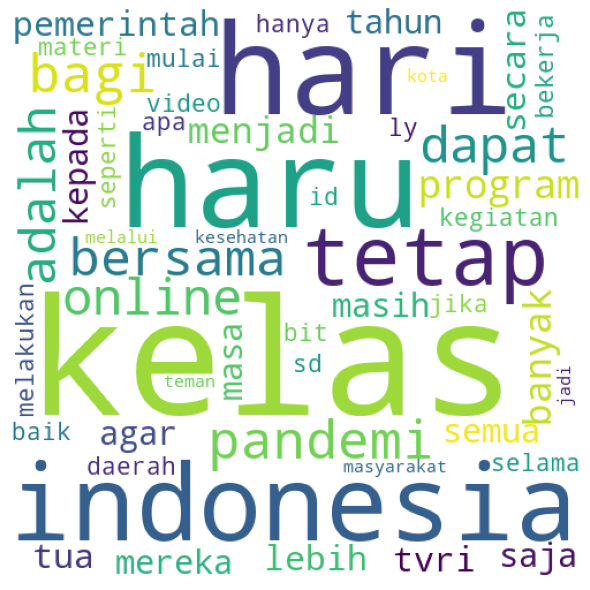

In [ ]:
#Wordcloud for the positive valence
pos_words = ''

for val in dfpos.Message:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  pos_words += ' '.join(tokens)+' '

wc = WordCloud(max_words=50,
               font_step=2,
               background_color='white', 
               collocations=False, width=500, height=500,
               stopwords=wcstopwords).generate(pos_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()

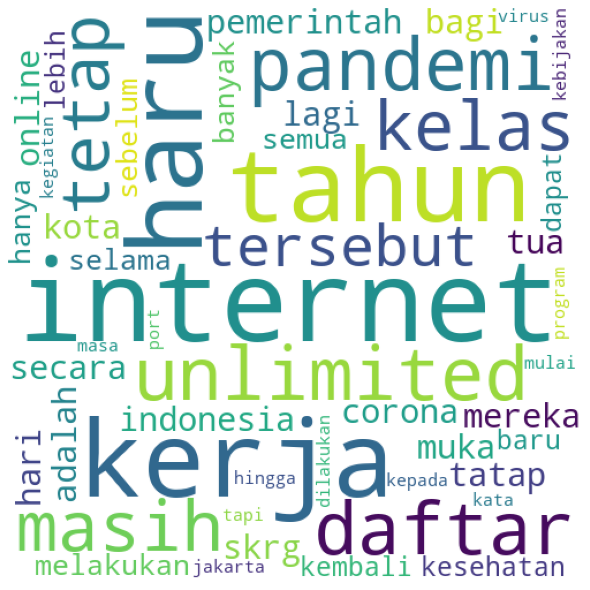

In [ ]:
#Wordcloud for the negative valence
neg_words = ''

for val in dfneg.Message:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  neg_words += ' '.join(tokens)+' '

wc = WordCloud(max_words=50,
               font_step=2,
               background_color='white', 
               collocations=False, width=500, height=500,
               stopwords=wcstopwords).generate(neg_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# Valence = -1 if love < other reactions, and 1 if otherwise
df['valence'] = 1
df.loc[df['pLove'] < (df['pWow']+df['pHaha']+df['pSad']+df['pAngry']+df['pCare']), 'valence'] = -1
df['valence'].describe()

count    9310.000000
mean        0.285929
std         0.958302
min        -1.000000
25%        -1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: valence, dtype: float64

In [ ]:
# Polarity = Intensity * Valence
df['polarity'] = df['intensity']*df['valence']
df['polarity'].describe()

count    9310.000000
mean       -0.018167
std         0.330946
min        -1.000000
25%        -0.056024
50%         0.030303
75%         0.111111
max         1.000000
Name: polarity, dtype: float64

In [ ]:
valpyear = pd.crosstab(df.year, df.valence, normalize='index').round(4)*100
valpyear

valence,-1,1
year,,
First,32.79,67.21
Second,49.91,50.09


In [ ]:
valpyear = pd.crosstab(df.year, df.valence)
valpyear

valence,-1,1
year,,
First,2533,5192
Second,791,794


In [ ]:
dfnopolarity = df.sort_values(by=['intensity'], ascending=[True])
dfnopolarity[['intensity','polarity','Message','pLove','pHaha','pWow','pSad','pAngry','pCare']]

,intensity,polarity,Message,pLove,pHaha,pWow,pSad,pAngry,pCare
327,0.000684,0.000684,"Selamat memperingati ""Hari Pendikan Nasional"" ...",1.0,0.0,0.0,0.0,0.0,0.0
322,0.000907,-0.000907,Jadwal BDR TVRI Kemendikbud Minggu ke Dua.... ...,0.0,1.0,0.0,0.0,0.0,0.0
442,0.001064,0.001064,"Khusus Siswa SD, 5 Tayangan TVRI Belajar dari ...",1.0,0.0,0.0,0.0,0.0,0.0
389,0.001091,0.001091,Kemendikbud: Perubahan panduan dan jadwal BDR ...,1.0,0.0,0.0,0.0,0.0,0.0
350,0.001276,0.001276,LEMBAR KERJA SISWA PEMBELAJARAN MELALUI TVRI M...,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24834,1.000000,-1.000000,SUSAHNYA!! 😭😭 KENA KERJA & BELAJAR DARI RUMAH ...,0.0,0.0,1.0,0.0,0.0,0.0
24836,1.000000,-1.000000,SALAM LOCKDOWN ‼️ 😥 DAH START KERJA & BELAJAR ...,0.0,0.0,0.0,1.0,0.0,0.0
24837,1.000000,-1.000000,SUSAHNYA!! 😭😭 KENA KERJA & BELAJAR DARI RUMAH ...,0.0,0.0,1.0,0.0,0.0,0.0
24839,1.000000,-1.000000,SALAM LOCKDOWN ‼️ 😥 DAH START KERJA & BELAJAR ...,0.0,0.0,0.0,1.0,0.0,0.0
